# Introduction
## Dataset
Retrieved from [Shanks' Braille Charachters Datase](https://www.kaggle.com/shanks0465/braille-character-dataset) which consists of 60 images for each alphabet. Thus, a total of **1560** images.
### Dataset Description
**Title:** 
> Braille Character Dataset

**Description:** 
> This dataset was created for the purpose of training a CNN for Braille Character Recognition.

**Image Description:** 
> Each image is a 28x28 image in BW Scale.
> Each image name consists of the character alphabet and the number of the image 
> and the type of data augmentation it went through. (i.e whs - width height shift, rot - Rotation, dim - brightness)

**Dataset composition:**
> 26 characters * 3 Augmentations * 20 different images of different augmentation values (i.e different shift,rotational and brightness values.)
## Approach
## Refrences

### Libraries Import

In [290]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Input, SeparableConv2D, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


### Data Preperation
Since the data was already cleaned up and pre-processesed. The following code splits the images into two generators a training and a validation generator.

In [291]:
data = ImageDataGenerator(rotation_range=10, shear_range=10, validation_split=0.1)
training_images = data.flow_from_directory('./images/', target_size=(28,28), subset='training')
validation_images = data.flow_from_directory('./images/', target_size=(28, 28), subset='validation')

Found 1404 images belonging to 26 classes.
Found 156 images belonging to 26 classes.


#### Plotting the image

In [292]:
def plotImages(images):
    fig, axes = plt.subplots(1,10, figsize=(28,28))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)

    plt.tight_layout()
    plt.show()    



# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(int(labels[i]))
#         plt.axis("off")


In [293]:

image_batch, label = training_images.next()
print("Total training images:", training_images.n)
print("Number of batches:", image_batch.shape[0])
print("Number of images in a batch:", len(training_images))

Total training images: 1404
Number of batches: 32
Number of images in a batch: 44


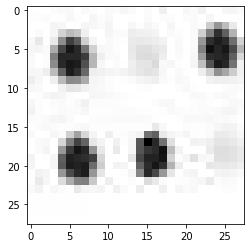

In [294]:
braille_a = image.load_img('./images/z/z1.JPG0rot.jpg')
plt.imshow(braille_a)


### Develop the model

In [295]:
print(training_images.image_shape)
# model = Sequential([Input(shape=(28, 28, 3)),
#                     Dense(64, activation='relu'),
#                     Dense(26, activation='softmax')
#                     ])

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam', metrics=['accuracy'])

# early_stopping = EarlyStopping(patience=20, verbose=1)


model = Sequential()
model.add(Input(shape=(28, 28, 3)))  #
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(GlobalMaxPooling2D())
model.add(Dense(128))
model.add(Dense(26, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
              
early_stopping = EarlyStopping(patience=20, verbose=1)


model.summary()


(28, 28, 3)
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_112 (Conv2D)         (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_113 (Conv2D)         (None, 3, 3, 128)         73856     
                                                                 
 global_max_pooling2d_19 (Gl  (None, 128)

In [296]:
trained_model = model.fit(training_images,
                          validation_data=validation_images,
                          epochs=200,
                          callbacks=[early_stopping],
                          batch_size=32,
                          verbose=1)


Epoch 1/200
44/44 [==============================] - 3s 54ms/step - loss: 9.3669 - accuracy: 0.0406 - val_loss: 3.2520 - val_accuracy: 0.0577
Epoch 2/200
44/44 [==============================] - 2s 45ms/step - loss: 3.2383 - accuracy: 0.0541 - val_loss: 3.2036 - val_accuracy: 0.0385
Epoch 3/200
44/44 [==============================] - 2s 47ms/step - loss: 3.1602 - accuracy: 0.0513 - val_loss: 3.1153 - val_accuracy: 0.0769
Epoch 4/200
44/44 [==============================] - 2s 49ms/step - loss: 3.0756 - accuracy: 0.0748 - val_loss: 3.0014 - val_accuracy: 0.1026
Epoch 5/200
44/44 [==============================] - 2s 48ms/step - loss: 2.9289 - accuracy: 0.1296 - val_loss: 2.7637 - val_accuracy: 0.1795
Epoch 6/200
44/44 [==============================] - 2s 50ms/step - loss: 2.7096 - accuracy: 0.2058 - val_loss: 2.6035 - val_accuracy: 0.2436
Epoch 7/200
44/44 [==============================] - 2s 51ms/step - loss: 2.5506 - accuracy: 0.2628 - val_loss: 2.5390 - val_accuracy: 0.2628
Epoch 

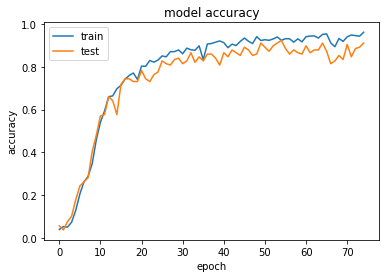

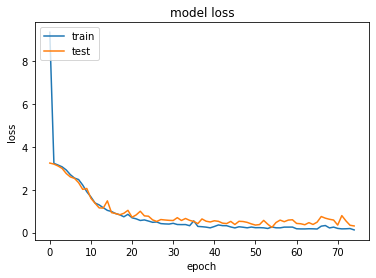

Model accuracy:  91.0 %


In [308]:
# summarize history for accuracy
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Model accuracy: ",round(trained_model.history['val_accuracy'][-1], 2)*100,"%")


### Model Predection


image shape:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=28x28 at 0x186A8F576D0>


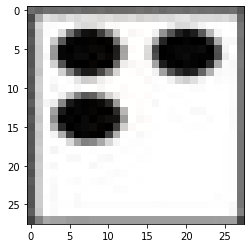

In [320]:
test_image = image.load_img('./test images/f.jpg')
print("image shape: ", test_image)
plt.imshow(test_image)



In [321]:
test_image_array = image.img_to_array(test_image)
print(test_image_array.shape)
test_image_array = test_image_array[np.newaxis]
print(test_image_array.shape)



(28, 28, 3)
(1, 28, 28, 3)


In [322]:
label = model.predict(test_image_array)
print("Predicted", label.argmax(-1))


Predicted [6]
